## Welcome to Health Bridge by Team Techno Devs

#### Importing Intel(R) Extension for Scikit-Learn for Enhanced Performance

In [42]:
from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
data=pd.read_csv("final.csv")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


#### Processing Data using LabelEncoder() from sklearn

In [43]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

list=["prognosis"]
for x in list:
    data[x] = label_encoder.fit_transform(data[x])
    
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


#### CSV Data

In [38]:
data.head(506)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


### Model Training
#### Dataset Splitting

In [44]:
X = data.drop(['prognosis'], axis=1)
y = data['prognosis']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training Model using Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

# Describing the Confusion-Matrix of the Model

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print()
print(conf_matrix)
print()
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Confusion Matrix: 

[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]

Accuracy: 100.0


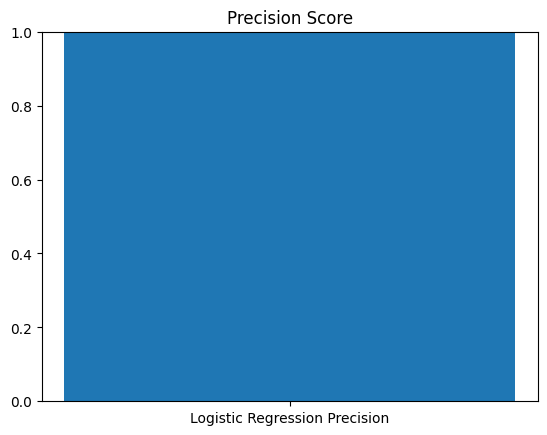

In [47]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Predict the target variable on the test data

precision = precision_score(y_test, y_pred, average="weighted")

plt.bar(['Logistic Regression Precision'], [precision])
plt.ylim(0, 1)
plt.title('Precision Score')
plt.show()

#### Plotting Confusion Matrix

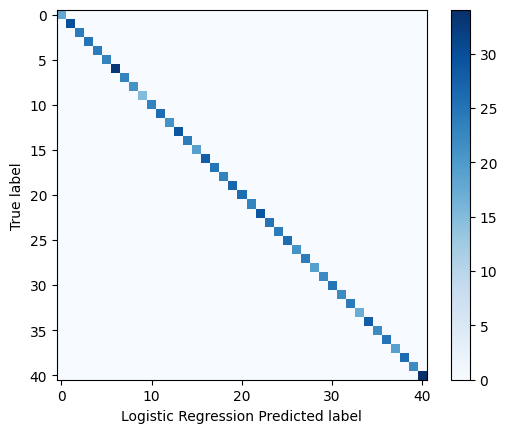

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Logistic Regression Predicted label')
plt.ylabel('True label')
plt.show()

### Training using SVC

In [50]:
from sklearn.svm import SVC
machine=SVC()
machine.fit(X_train,y_train)
y_pred = machine.predict(X_test)

# Describing the Confusion-Matrix of the Model

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print()
print(conf_matrix)
print()

# Evaluate the accuracy of the model

accuracy=machine.score(X_test,y_test)
print("SVC Accuracy:", accuracy*100)

Confusion Matrix: 

[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]

SVC Accuracy: 100.0


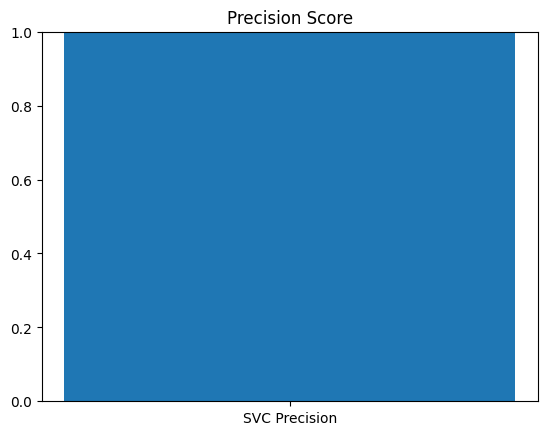

In [51]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
# Predict the target variable on the test data

precision = precision_score(y_test, y_pred, average="weighted")

plt.bar(['SVC Precision'], [precision])
plt.ylim(0, 1)
plt.title('Precision Score')
plt.show()


#### Plotting Confusion Matrix

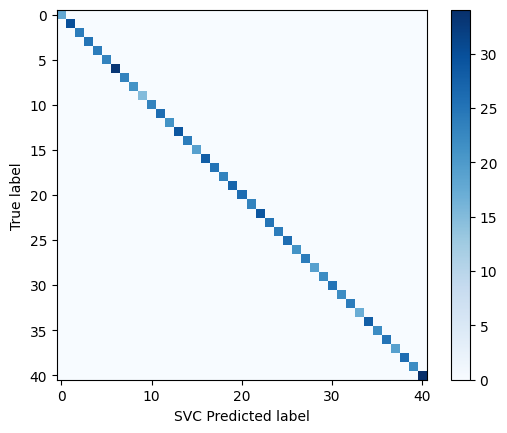

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('SVC Predicted label')
plt.ylabel('True label')
plt.show()

In [53]:
decoded_final = {15: "Fungal Infection",4:"Allergy",16:"GERD",9:"Chronic cholestasis",14:'Drug Reaction',33:'Peptic ulcer diseae',1:'AIDS',12:'Diabetes' ,17:'Gastroenteritis',6:'Bronchial Asthma',23:'Hypertension' ,30:'Migraine',7:'Cervical spondylosis',32:'Paralysis (brain hemorrhage)',28:'Jaundice',29:'Malaria',8:'Chicken pox',11:'Dengue',37:'Typhoid',40:'hepatitis A',19:'Hepatitis B',20:'Hepatitis C',21:'Hepatitis D',22:'Hepatitis E',3:'Alcoholic hepatitis',36:'Tuberculosis',10:'Common Cold',34:'Pneumonia',13:'Dimorphic hemmorhoids(piles)',18:'Heart attack',39:'Varicose veins',26:'Hypothyroidism',24:'Hyperthyroidism',25:'Hypoglycemia',31:'Osteoarthristis',5:'Arthritis',0:'(vertigo) Paroymsal  Positional Vertigo',2:'Acne',38:'Urinary tract infection',35:'Psoriasis',27:'Impetigo'
}

In [55]:
new_data=pd.read_csv("prediction.csv")
predictions = logistic_reg.predict(new_data)
print("Predictions:", decoded_final[predictions[0]])


Predictions: Chronic cholestasis


WARNING : Running the Below Cell will replace the generated Model with the Changes. Make sure Model is perfectly working before running the next cell.

In [16]:
# To retrain the model, uncomment the codes below ->
# import pickle
# filename = '../telemedicine_model'
# pickle.dump(logistic_reg, open(filename, 'wb'))